## Unemployment Analysis

### Importing Necessarry Libaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings("ignore")

### Importing the Data

In [2]:
df = pd.read_csv("Unemployment in India.csv")
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
91,Gujarat,30-04-2020,Monthly,12.00,8587594.0,34.77,Rural
681,Tamil Nadu,30-04-2020,Monthly,45.55,4632967.0,26.17,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
429,Chhattisgarh,31-07-2019,Monthly,8.17,2285436.0,45.85,Urban
551,Kerala,30-09-2019,Monthly,5.52,4640642.0,36.57,Urban


### Data Understanding and Preprocessing

In [3]:
df.shape

(768, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.isna().mean()*100

Region                                      3.645833
 Date                                       3.645833
 Frequency                                  3.645833
 Estimated Unemployment Rate (%)            3.645833
 Estimated Employed                         3.645833
 Estimated Labour Participation Rate (%)    3.645833
Area                                        3.645833
dtype: float64

In [6]:
df = df.dropna()  # dropping null values

In [7]:
df.shape

(740, 7)

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df["Date"] = pd.to_datetime(df["Date"])  # changing to datetime format

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [11]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [12]:
continous_columns = df.select_dtypes(include = "float64").columns
categorical_columns = df.select_dtypes(include = "object").columns

### Univariate Analysis - Numeric Columns

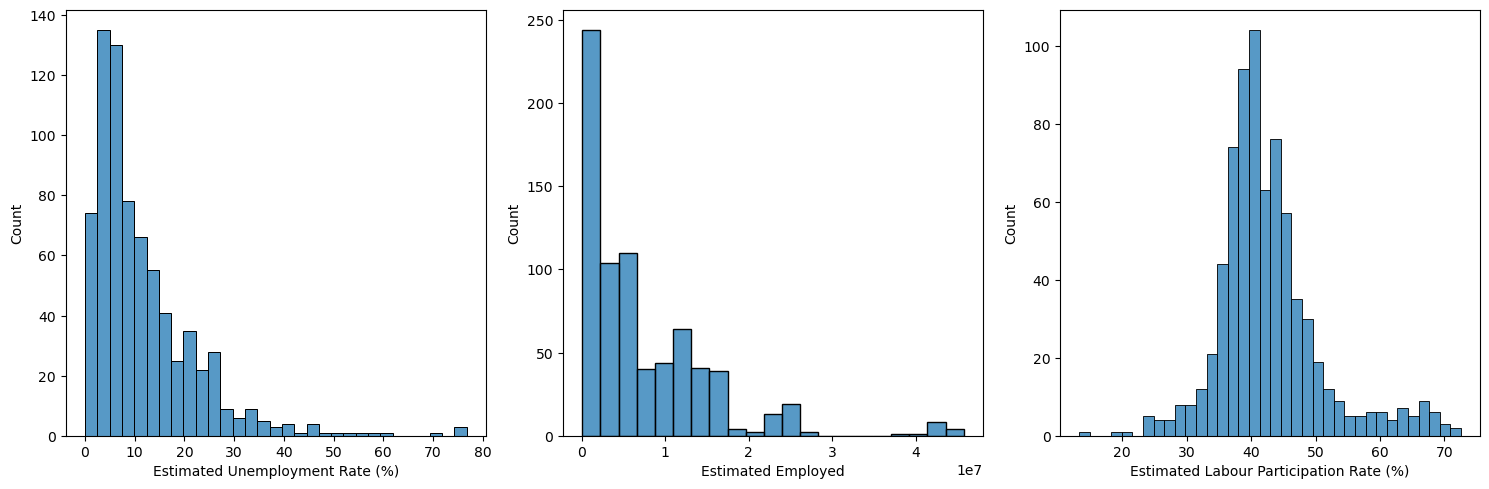

In [13]:
plt.figure(figsize = (15,5))
fignum = 0
for i in continous_columns:
    fignum = fignum +1 
    plt.subplot(1,3,fignum)
    sns.histplot(x= df[i])
plt.tight_layout()    
plt.show()

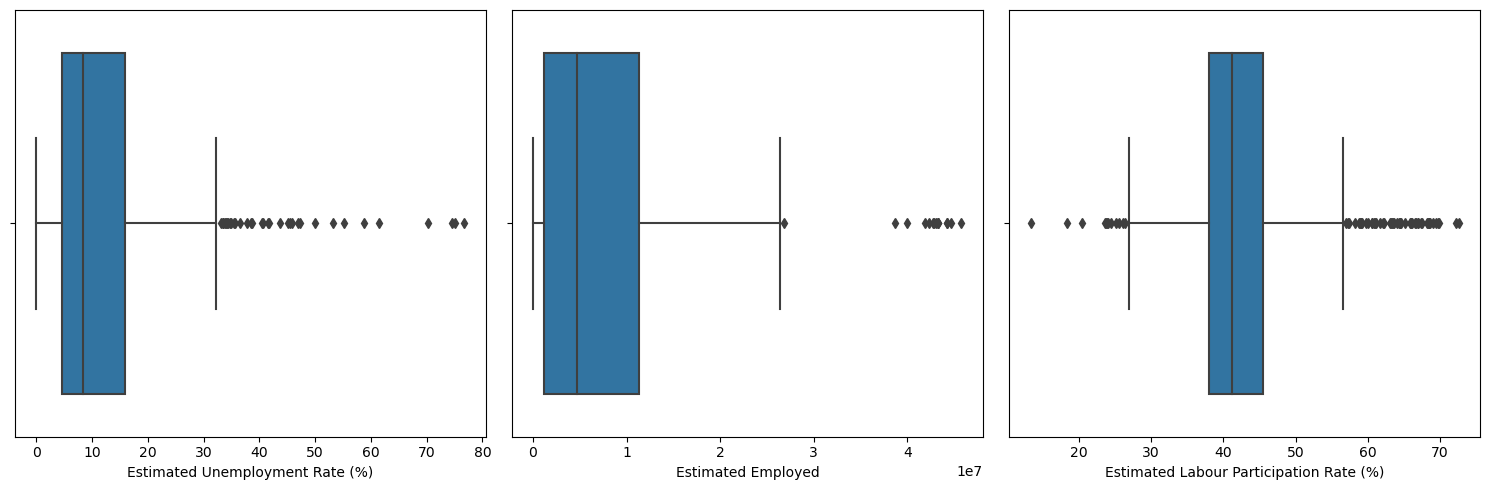

In [14]:
plt.figure(figsize = (15,5))
fignum = 0
for i in continous_columns:
    fignum = fignum +1 
    plt.subplot(1,3,fignum)
    sns.boxplot(x= df[i])
plt.tight_layout()    
plt.show()

### Univarite Analysis - Categorical Columns

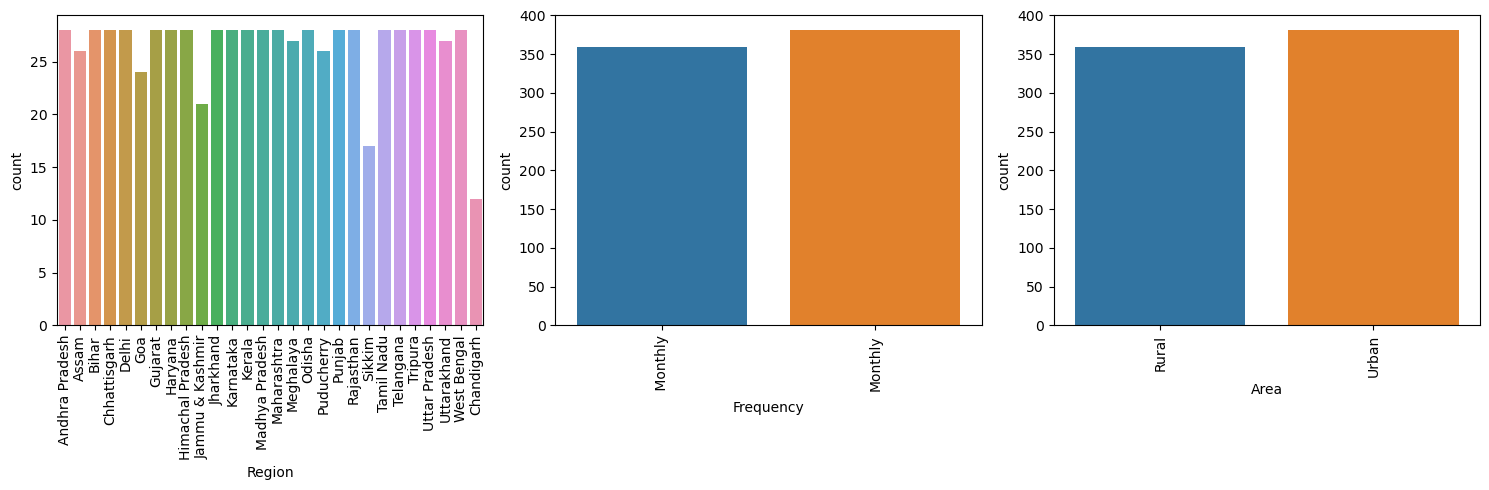

In [15]:
plt.figure(figsize = (15,5))
fignum = 0
for i in categorical_columns:
    fignum = fignum +1 
    plt.subplot(1,3,fignum)
    sns.countplot(x= df[i])
    plt.xticks(rotation = 90)
plt.tight_layout()    
plt.show()

### Bivariate Analysis

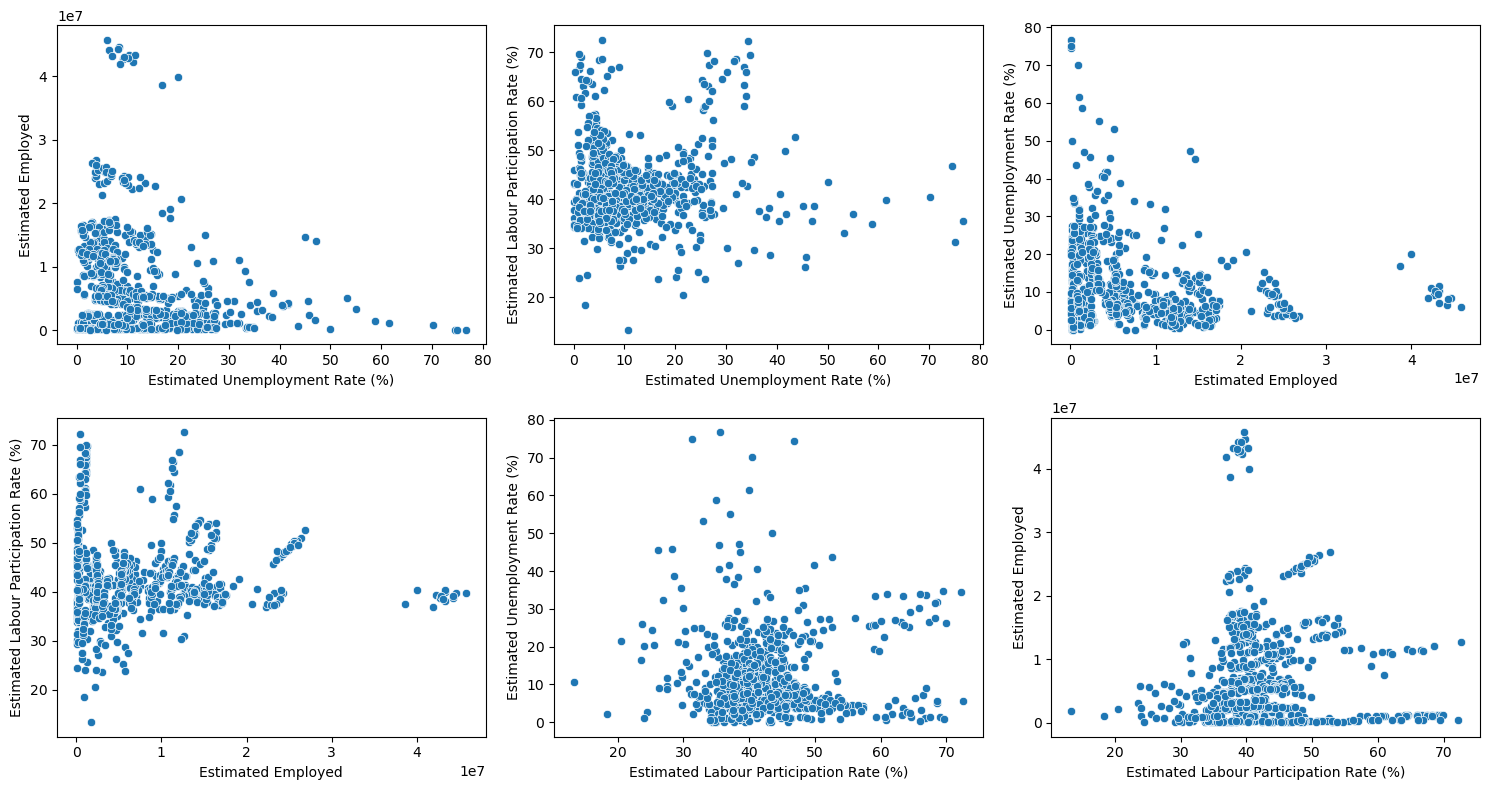

In [16]:
plt.figure(figsize = (15,8))
fignum = 0
for i in continous_columns:
    for j in continous_columns:
        if i!=j:
            fignum = fignum +1 
            plt.subplot(2,3,fignum)
            sns.scatterplot(x= df[i],y = df[j])
plt.tight_layout()    
plt.show()

### Explorartory Data Analysis

In [17]:
temp =df.groupby("Region").mean().sort_values(by = "Estimated Unemployment Rate (%)",ascending = False).head(10)
temp= temp.reset_index()
temp

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Tripura,28.350357,7.170026e+05,61.823929
1,Haryana,26.283214,3.557072e+06,42.737143
2,Jharkhand,20.585000,4.469240e+06,41.670714
3,Bihar,18.918214,1.236619e+07,38.153929
4,Himachal Pradesh,18.540357,1.059824e+06,44.222143
5,Delhi,16.495357,2.627513e+06,38.929643
6,Jammu & Kashmir,16.188571,1.799932e+06,41.030952
7,Chandigarh,15.991667,3.168312e+05,39.336667
8,Rajasthan,14.058214,1.004106e+07,39.973214
9,Uttar Pradesh,12.551429,2.809483e+07,39.432500


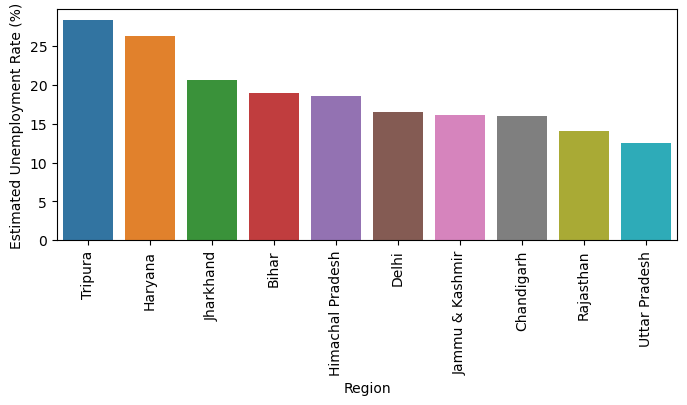

In [18]:
plt.figure(figsize = (8,3))
sns.barplot(x = "Region",y ="Estimated Unemployment Rate (%)",data = temp)
plt.xticks(rotation = 90)
plt.show()

 Top 10 Region where unemployment rate is high

<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Count'>

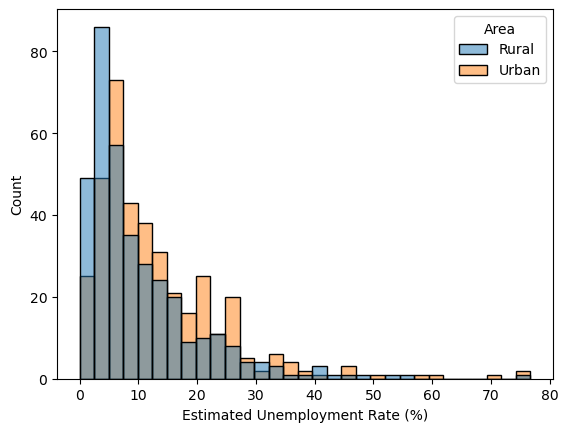

In [19]:
sns.histplot(x = "Estimated Unemployment Rate (%)",hue = "Area",data= df)

<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Count'>

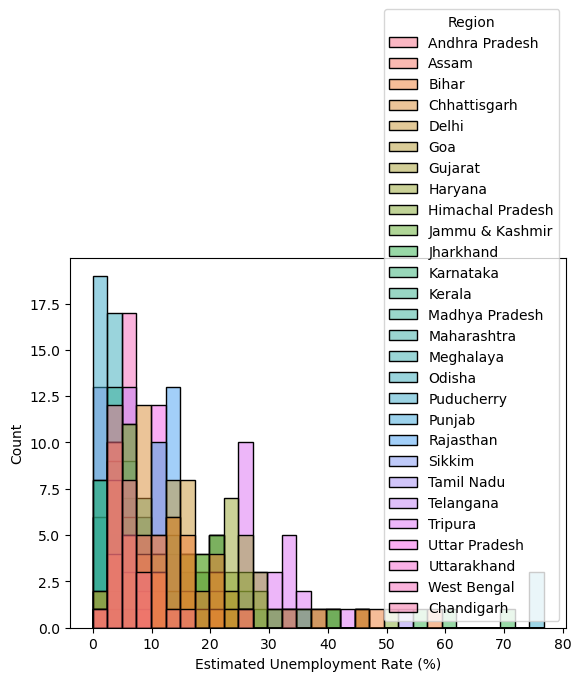

In [20]:
sns.histplot(x = "Estimated Unemployment Rate (%)",hue = "Region",data= df)

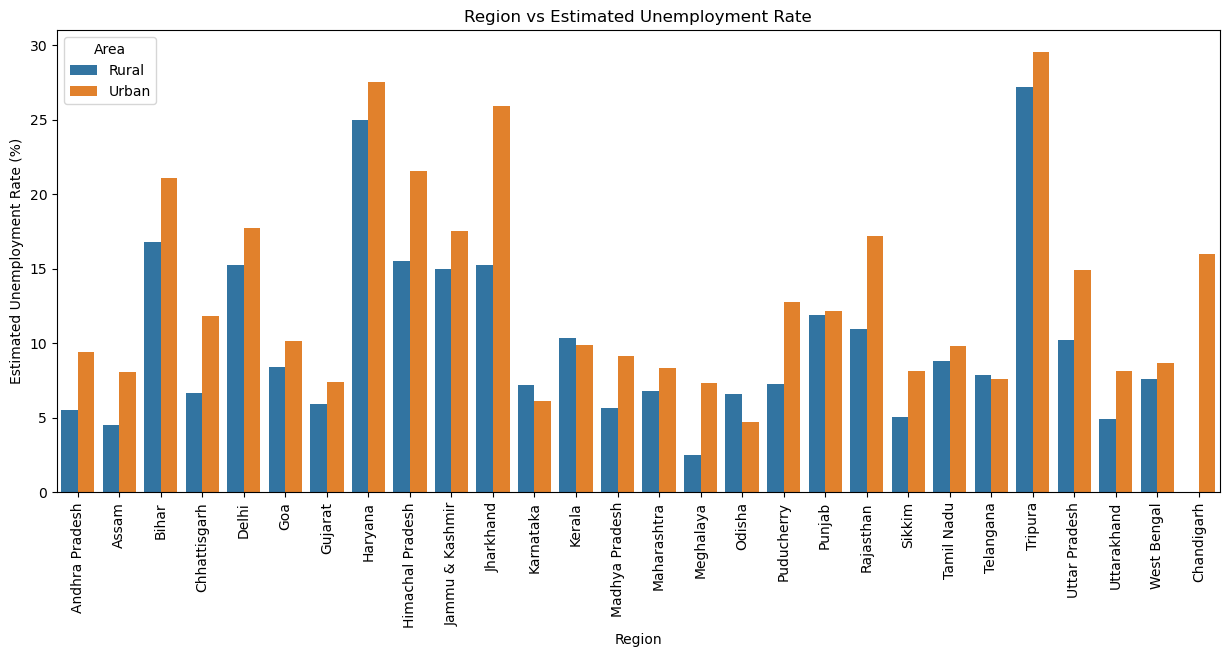

In [21]:
plt.figure(figsize = (15,6))
sns.barplot(x = "Region",y ="Estimated Unemployment Rate (%)",hue = "Area",data = df,ci = None )
plt.xticks(rotation = 90)
plt.title("Region vs Estimated Unemployment Rate")
plt.show()

Haryana, Jharkhand and Tripura has the highest unemployment in Urban area and Assam has the highest unemployment in Rural area